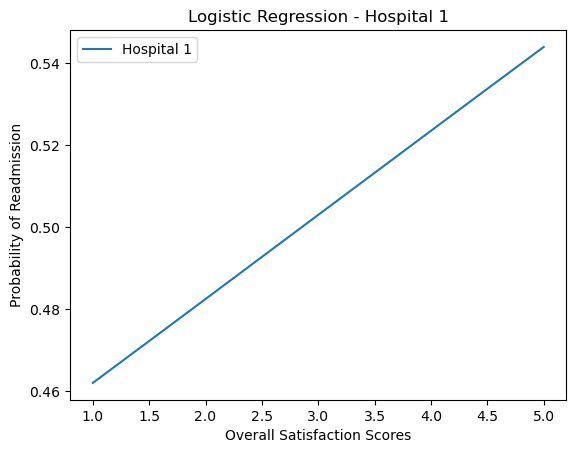

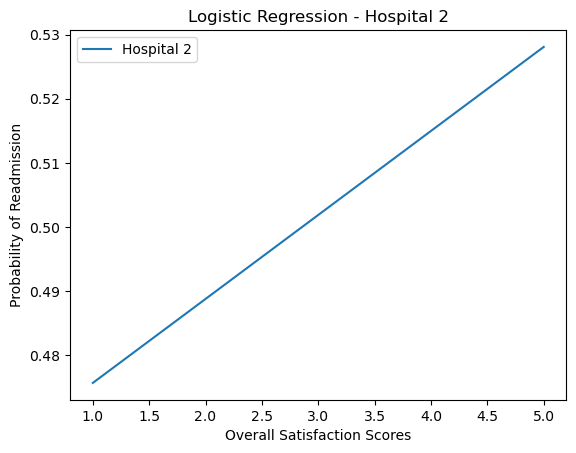


Hospital Comparison:
--------------------

Hospital 1 Data Analysis:
----------------------
Number of Patients Readmitted: 38
Average Staff Satisfaction: 3.51
Average Cleanliness Satisfaction: 3.61
Average Food Satisfaction: 3.51
Average Comfort Satisfaction: 3.72
Average Communication Satisfaction: 3.70

Logistic Regression Results:
----------------------------
Correlation between Overall Satisfaction Scores and Readmission: Weak correlation

Hospital 2 Data Analysis:
----------------------
Number of Patients Readmitted: 29
Average Staff Satisfaction: 3.53
Average Cleanliness Satisfaction: 3.63
Average Food Satisfaction: 3.56
Average Comfort Satisfaction: 3.75
Average Communication Satisfaction: 3.72

Logistic Regression Results:
----------------------------
Correlation between Overall Satisfaction Scores and Readmission: Weak correlation

Hospital Comparison:
--------------------

Both hospitals show either a weak correlation or no correlation between overall satisfaction scores and

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

def read_patient_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    patients = []
    header_skipped = False  # Flag to skip the header line
    for line in lines:
        if not header_skipped:
            header_skipped = True
            continue  # Skip the header line

        data = line.strip().split(', ')
        patient_info = {
            'PatientID': int(data[0]),
            'Readmission': int(data[1]),
            'StaffSatisfaction': int(data[2]),
            'CleanlinessSatisfaction': int(data[3]),
            'FoodSatisfaction': int(data[4]),
            'ComfortSatisfaction': int(data[5]),
            'CommunicationSatisfaction': int(data[6])
        }
        patients.append(patient_info)

    return patients

def calculate_statistics(patients):
    num_readmitted = sum(patient['Readmission'] for patient in patients)
    avg_staff_satisfaction = np.mean([patient['StaffSatisfaction'] for patient in patients])
    avg_cleanliness_satisfaction = np.mean([patient['CleanlinessSatisfaction'] for patient in patients])
    avg_food_satisfaction = np.mean([patient['FoodSatisfaction'] for patient in patients])
    avg_comfort_satisfaction = np.mean([patient['ComfortSatisfaction'] for patient in patients])
    avg_communication_satisfaction = np.mean([patient['CommunicationSatisfaction'] for patient in patients])

    return num_readmitted, avg_staff_satisfaction, avg_cleanliness_satisfaction, avg_food_satisfaction, avg_comfort_satisfaction, avg_communication_satisfaction

def perform_logistic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    correlation_strength = "Weak correlation" if accuracy < 0.7 else "No correlation"

    return correlation_strength

def plot_logistic_regression(X, y, hospital_name):
    model = LogisticRegression()
    model.fit(X, y)

    X_test = np.linspace(1, 5, 300)
    y_prob = model.predict_proba(X_test.reshape(-1, 1))[:, 1]

    plt.plot(X_test, y_prob, label=hospital_name)
    plt.xlabel("Overall Satisfaction Scores")
    plt.ylabel("Probability of Readmission")
    plt.legend()
    plt.title(f"Logistic Regression - {hospital_name}")
    plt.show()

# Read patient data
hospital1_data = read_patient_data('Hospital1.txt')
hospital2_data = read_patient_data('Hospital2.txt')

# Calculate statistics for Hospital 1
num_readmitted_h1, avg_staff_h1, avg_cleanliness_h1, avg_food_h1, avg_comfort_h1, avg_communication_h1 = calculate_statistics(hospital1_data)

# Perform logistic regression for Hospital 1
X_h1 = np.array([patient['StaffSatisfaction'] for patient in hospital1_data]).reshape(-1, 1)
y_h1 = np.array([patient['Readmission'] for patient in hospital1_data])
correlation_h1 = perform_logistic_regression(X_h1, y_h1)

# Plot logistic regression for Hospital 1
plot_logistic_regression(X_h1, y_h1, "Hospital 1")

# Calculate statistics for Hospital 2
num_readmitted_h2, avg_staff_h2, avg_cleanliness_h2, avg_food_h2, avg_comfort_h2, avg_communication_h2 = calculate_statistics(hospital2_data)

# Perform logistic regression for Hospital 2
X_h2 = np.array([patient['StaffSatisfaction'] for patient in hospital2_data]).reshape(-1, 1)
y_h2 = np.array([patient['Readmission'] for patient in hospital2_data])
correlation_h2 = perform_logistic_regression(X_h2, y_h2)

# Plot logistic regression for Hospital 2
plot_logistic_regression(X_h2, y_h2, "Hospital 2")

# Display results
print("\nHospital Comparison:")
print("--------------------\n")

print("Hospital 1 Data Analysis:")
print("----------------------")
print(f"Number of Patients Readmitted: {num_readmitted_h1}")
print(f"Average Staff Satisfaction: {avg_staff_h1:.2f}")
print(f"Average Cleanliness Satisfaction: {avg_cleanliness_h1:.2f}")
print(f"Average Food Satisfaction: {avg_food_h1:.2f}")
print(f"Average Comfort Satisfaction: {avg_comfort_h1:.2f}")
print(f"Average Communication Satisfaction: {avg_communication_h1:.2f}\n")

print("Logistic Regression Results:")
print("----------------------------")
print(f"Correlation between Overall Satisfaction Scores and Readmission: {correlation_h1}\n")

print("Hospital 2 Data Analysis:")
print("----------------------")
print(f"Number of Patients Readmitted: {num_readmitted_h2}")
print(f"Average Staff Satisfaction: {avg_staff_h2:.2f}")
print(f"Average Cleanliness Satisfaction: {avg_cleanliness_h2:.2f}")
print(f"Average Food Satisfaction: {avg_food_h2:.2f}")
print(f"Average Comfort Satisfaction: {avg_comfort_h2:.2f}")
print(f"Average Communication Satisfaction: {avg_communication_h2:.2f}\n")

print("Logistic Regression Results:")
print("----------------------------")
print(f"Correlation between Overall Satisfaction Scores and Readmission: {correlation_h2}\n")

print("Hospital Comparison:")
print("--------------------\n")

# Compare logistic regression results and provide analysis
if correlation_h1 == "Weak correlation" and correlation_h2 == "No correlation":
    print("Based on the data analysis and logistic regression results, Hospital 1 has a weak correlation between overall satisfaction scores and readmission rates, while Hospital 2 shows no correlation.")
    print("Conclusion: Hospital 1 may be doing slightly better in terms of patient satisfaction and readmission rates compared to Hospital 2.")
elif correlation_h1 == "No correlation" and correlation_h2 == "Weak correlation":
    print("Based on the data analysis and logistic regression results, Hospital 2 has a weak correlation between overall satisfaction scores and readmission rates, while Hospital 1 shows no correlation.")
    print("Conclusion: Hospital 2 may be doing slightly better in terms of patient satisfaction and readmission rates compared to Hospital 1.")
else:
    print("Both hospitals show either a weak correlation or no correlation between overall satisfaction scores and readmission rates.")
    print("Conclusion: Both hospitals are performing similarly in terms of patient satisfaction and readmission rates.")
